In [7]:
import mylastool
import os

container = mylastool.get_container()
mylastool.print_list_of_lasfiles(container)

31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_4.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_5.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_6.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_7.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_8.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_9.LAS
31_5-7 Eos/05.LWD_Log_data/WL_RAW_GR-MECH_TIME_MWD_1.LAS
31_5-7 Eos/07.Borehole_Seismic/TZV_DEPTH_MD_COMPUTED_2020-01-17_1.LAS
31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_1.LAS
31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_2.LAS
31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_3.LAS
31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_4.LAS
31_5-7 Eos/07.Borehole_Seismic/VSPZO_COMPUTED_TIME_CS_2

In [10]:
filename = '31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_2.LAS'
lines = mylastool.read_lasfile(container, filename)
print(*lines, sep='\n')

~Version Information
VERS  .          2.0                              :CWLS Log Ascii Standard - Version 2.0
WRAP  .          NO                               :One line per depth step
~Well Information Block
#MNEM.UNIT       Data Type                        Information
#---------       ---------                        -------------------------------
STRT  .S         1.84600                          :START DEPTH
STOP  .S         2.56700                          :STOP DEPTH
STEP  .S         0.00100                          :INCREMENT
NULL  .          -999.25                          :NULL DATA VALUE
COMP  .          Equinor                          :COMPANY
WELL  .          31/5-7                           :WELL
FLD   .          Eos                              :FIELD
LOC   .                                           :LOCATION
PROV  .                                           :PROVINCE
STAT  .                                           :STATE
CNTY  .                                      

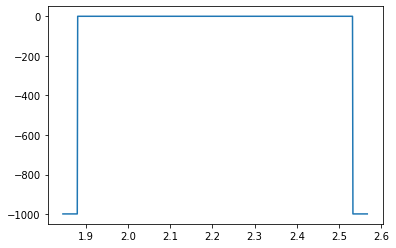

In [15]:
values = []
for row in mylastool.get_data_section(lines):
    values.append([float(col) for col in row.split()])
curves = list(zip(*values))
#print(curves)

import matplotlib.pyplot as plt
plt.plot(curves[0], curves[1])

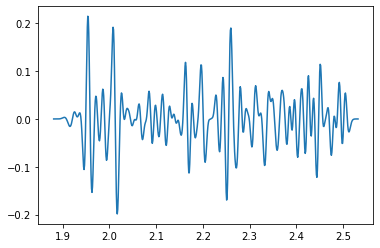

In [16]:
import numpy as np
curves = np.array(values).T
curves = np.where(curves==-999.25, np.nan, curves)

import matplotlib.pyplot as plt
plt.plot(curves[0], curves[1])

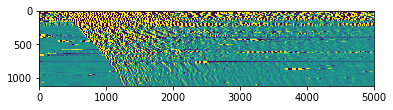

In [19]:
import segyio
import matplotlib.pyplot as plt

traces = []
with segyio.open('VSPZO_RAW_2020-01-17_4.SEGY', strict=False) as f:
    for trace in f.trace:
        traces.append(list(trace))
plt.imshow(traces, vmin=-0.01, vmax=0.01)
